# Exploratory analysis

Incarcarea setului de date curatat anterior in notebook-ul [2_data_cleaning.ipynb](2_data_cleaning_etl.ipynb)

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [85]:
path_to_dataset = '../data/processed/2_clean_data.csv'

if not os.path.isfile(path_to_dataset):
    print('not good')

In [86]:
df = pd.read_csv(path_to_dataset)

In [87]:
df.shape

(520, 9)

In [88]:
df.head(n = 5)

,Unnamed: 0,Pret,Suprafata_Utila,Camere,Pret_mp,Zona,Vechime_Imobil,Compartimentare,Tip_Zona
0,0,72500,41.0,1,1768.29,Nicolina-CUG,Nou (Post-2000),Decomandat,Accesibil/Rezidential
1,2,180000,72.4,3,2486.19,Centru-Civic,Nou (Post-2000),Decomandat,Premium
2,11,106000,50.0,2,2120.00,Nicolina-CUG,Nou (Post-2000),Decomandat,Accesibil/Rezidential
3,12,73500,57.0,2,1289.47,Tatarasi-Tudor,Vechi (Pre-1977),Semidecomandat,Standard/Urban
4,17,105000,80.0,3,1312.50,Bucium,Nou (Post-2000),Nespecificat,Periferie


In [89]:
df['Unnamed: 0'].head(n = 2)

0    0
1    2
Name: Unnamed: 0, dtype: int64

In [90]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [91]:
df.tail(n = 5)

,Pret,Suprafata_Utila,Camere,Pret_mp,Zona,Vechime_Imobil,Compartimentare,Tip_Zona
515,112900,57.0,2,1980.70,Tatarasi-Tudor,Clasic (1977-2000),Nespecificat,Standard/Urban
516,125500,75.0,3,1673.33,Nicolina-CUG,Clasic (1977-2000),Decomandat,Accesibil/Rezidential
517,59000,35.0,1,1685.71,Nicolina-CUG,Clasic (1977-2000),Decomandat,Accesibil/Rezidential
518,127000,74.0,3,1716.22,Nicolina-CUG,Clasic (1977-2000),Nespecificat,Accesibil/Rezidential
519,90000,55.0,3,1636.36,Tatarasi-Tudor,Clasic (1977-2000),Semidecomandat,Standard/Urban


### Analiza statistica a variabilelor categoriale

- **Tabelarea datelor** - Tabele de contingenta, cum ar fi Tip_Zona vs Compartimentare, Zona vs Vechime_Imobil

- **Analiza de asociere** - Testul chi patrat, pentru a vedea daca tipul zonei influenteaza modul din care sunt compartimentate apartamentele

- **Analiza de concordanta** 

In [92]:
pd.crosstab(df['Tip_Zona'], df['Compartimentare'], margins=False)

Compartimentare,Decomandat,Nespecificat,Semidecomandat
Tip_Zona,,,
Accesibil/Rezidential,124,49,3
Periferie,13,24,1
Premium,36,34,3
Standard/Urban,101,102,30


In [93]:
pd.crosstab(df['Tip_Zona'], df['Vechime_Imobil'], margins=True)

Vechime_Imobil,Clasic (1977-2000),Nou (Post-2000),Vechi (Pre-1977),All
Tip_Zona,,,,
Accesibil/Rezidential,95,72,9,176
Periferie,4,33,1,38
Premium,33,31,9,73
Standard/Urban,104,52,77,233
All,236,188,96,520


In [94]:
33/38 * 100

86.8421052631579

In [95]:
9/73 * 100

12.32876712328767

### OBS:

- In tipul de zona "Standard/Urban", adica ['Tatarasi-Tudor', 'Podu-Ros-Cantemir', 'Pacurari-Canta', 'Alexandru-Dacia'] sunt mai multe apartamente Vechi (Pre-1977) decat apartemente Noi (Post-2000)

- La periferie cele mai multe apartamente sunt noi, cu un procentaj de 86.84%

- La tipul de zona premium ['Copou-Saras', 'Centru-Civic'] sunt si apartamente vechi, cu un procentaj de 12.32%

### Chi-Square Test

- Ne ajuta sa vedem daca exista legaturi importante intre variabilele noastre categoriale, de exemplu "Tip_Zona" vs "Vechime_Imobil"

In [96]:
from scipy.stats import chi2_contingency

In [97]:
def perform_chi_square_test(data, col1, col2):
    contingency_table = pd.crosstab(data[col1], data[col2])

    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    significant = p < 0.05
    return chi2, p, significant

results = perform_chi_square_test(df, 'Tip_Zona', 'Vechime_Imobil')

results

(np.float64(104.79462993929755), np.float64(2.5020522501029243e-20), np.True_)

### Interpretarea valorilor

- Chi-square calculat = 104.79, destul de mare. Masoara distanta dintre ceea ce am observat in datele mele si ceea ce s-ar fi asteptat sa apara daca zonele si vechimea imobilelor nu ar fi avut nicio legatura. Cu cat e mai mare, cu atat legatura este mai puternica

- p-value = 2.5 x pow(10, -20) < 0.05, respingem ipoteza nula H0

- significant = True, confirmare ca s-ar putea sa fie o legatura semnificativa

### Concluzie

Se respinge ipoteza de independenta cu un risc asumat de 5%, existand dovezi statistice ca tipul zonei este corelat cu vechimea imobilului

### Traducere 

Testul spune ca exista o legatura, dar nu poate sugera care este exact.

Privind datele, legatura este:

- Zonele Premium ['Copou-Saras', 'Centru-Civic'] au un mix de cladiri clasice si noi

- Zonele Standard ['Tatarasi-Tudor', 'Podu-Ros-Cantemir', 'Pacurari-Canta', 'Alexandru-Dacia'] sunt dominate de blocuri clasice sau vechi

- Zonele de Periferie [Bucium, Periferie-Metropolitana] sunt dominate de blocuri noi, cu un procentaj de peste 85%

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pret             520 non-null    int64  
 1   Suprafata_Utila  520 non-null    float64
 2   Camere           520 non-null    int64  
 3   Pret_mp          520 non-null    float64
 4   Zona             520 non-null    object 
 5   Vechime_Imobil   520 non-null    object 
 6   Compartimentare  520 non-null    object 
 7   Tip_Zona         520 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 32.6+ KB


In [99]:
perform_chi_square_test(df, 'Zona', 'Camere')

(np.float64(46.90275383331749), np.float64(0.0002187778580279596), np.True_)

### Interpretare

- chi-square calculat = 46.902

- p-value = 0.0002 < 0.05, respingem ipoteza nula H0

- significant = True, legatura semnificativa

### Concluzie

Respingem ipoteza de independenta cu un risc asumat de 5%, existand dovezi statistice ca zona din Iasi este corelata cu numarul de camere al apartamentului

In [100]:
pd.crosstab(df['Zona'], df['Camere'], margins=True)

Camere,1,2,3,All
Zona,,,,
Alexandru-Dacia,4,36,26,66
Bucium,7,17,1,25
Centru-Civic,7,26,16,49
Copou-Saras,8,14,2,24
Galata-Frumoasa,11,17,10,38
Nicolina-CUG,23,67,48,138
Pacurari-Canta,5,18,27,50
Periferie-Metropolitana,4,7,2,13
Podu-Ros-Cantemir,12,27,19,58


In [101]:
pd.crosstab(df['Tip_Zona'], df['Camere'], margins=True)

Camere,1,2,3,All
Tip_Zona,,,,
Accesibil/Rezidential,34,84,58,176
Periferie,11,24,3,38
Premium,15,40,18,73
Standard/Urban,33,117,83,233
All,93,265,162,520


In [102]:
perform_chi_square_test(df, 'Tip_Zona', 'Camere')

(np.float64(15.866965369100557), np.float64(0.014486112127644167), np.True_)

In [103]:
3/36 * 100

8.333333333333332

In [104]:
40/73 * 100

54.794520547945204

In [105]:
83/233 * 100

35.622317596566525

### Traducere

- Periferia este dominata de garsoniere si apartamente cu 2 camere, cele cu 3 avand un procentaj foarte mic, de 8%

- Apartamentele in zone Premium sunt in mare parte cu 2 camere, peste 54%

- Zonele accesibile cat si cele standard sunt dominate de apartamente cu 2 camere sau 3 camere, in zonele standard cele de 3 camere avand un procentaj semnificativ de 35%


### Analiza de concordanta

- 1. Cream tabelul de contingenta

- 2. Obtinem chi2 si n

- 3. Coeficientul de contingenta

- 4. Cramer's V

- 5. Corectie pentru bias (optional)

In [106]:
def calculeaza_concordanta(data, col1, col2):
    contingency_table = pd.crosstab(data[col1], data[col2])
    
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    
    c_coeff = np.sqrt(chi2 / (chi2 + n))
    
    phi2 = chi2 / n
    r, k = contingency_table.shape
    v_coeff = np.sqrt(phi2 / min(k - 1, r - 1))
    
    return c_coeff, v_coeff

c, v = calculeaza_concordanta(df, 'Tip_Zona', 'Vechime_Imobil')
print(f"Coeficient de Contingenta: {c:.4f}")
print(f"Cramer's V: {v:.4f}")

Coeficient de Contingenta: 0.4095
Cramer's V: 0.3174


### Interpretare

- V = 0.31, care se afla intre 0.3 - 0.5, deci exista o tendinta clara (asociere medie)

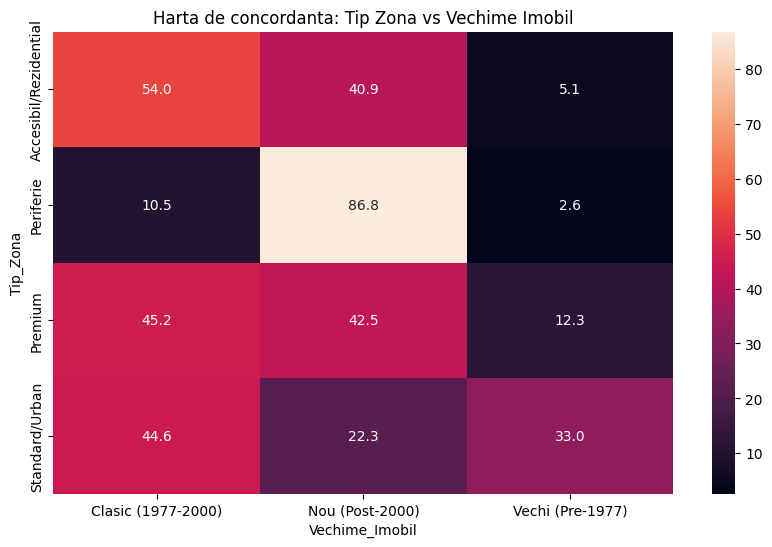

In [107]:
tabel_procente = pd.crosstab(df['Tip_Zona'], df['Vechime_Imobil'], normalize='index') * 100

plt.figure(figsize=(10, 6))
sns.heatmap(tabel_procente, annot=True, fmt=".1f")
plt.title('Harta de concordanta: Tip Zona vs Vechime Imobil')
plt.show()

### Traduceri

- Cum a fost observat si mai sus, este o legatura stransa intre Periferie si Nou (apartamente noi)

- La Periferie nu sunt mai deloc apartamente Vechi, doar blocuri noi cu un procentaj de peste 85%

- Blocuri Vechi si Clasice se gasesc majoritar la zone Standard/Urban

- Blocurile Clasice domina in zone Accesibil/Rezidential

- La zone Premium predomina apartamente Clasice si Noi

Pentru clarificari: 

- **Premium**: Copou-Saras, Centru-Civic

- **Standard/Urban**: Tatarasi-Tudor, Podu-Ros-Cantemir, Pacurari-Canta, Alexandru-Dacia

- **Accesibil/Rezidential**: Nicolina-CUG, Galata-Frumoasa

- **Periferie**: Bucium, Periferie-Metropolitana

### Estimarea si testarea mediilor

1. **Estimarea mediei prin interval de incredere:**

- Vrem sa aflam care este pretul mediu real pe mp in Iasi, cu o siguranta de 95%

In [108]:
import scipy.stats as stats

In [109]:
df['Pret_mp'].isna().sum()

np.int64(0)

In [110]:
medie = df['Pret_mp'].mean()
sigma = df['Pret_mp'].std()
n = len(df['Pret_mp'])
conf = 0.95

In [111]:
interval = stats.t.interval(conf, df=n-1, loc=medie, scale=sigma/np.sqrt(n))

In [112]:
print(f"Medie esantion: {medie:.2f} eur/mp")
print(f"Interval de incredere 95%: {interval[0]:.2f} - {interval[1]:.2f} eur/mp")

Medie esantion: 1870.72 eur/mp
Interval de incredere 95%: 1847.09 - 1894.35 eur/mp


### Interpretare

- Suntem 95% convinsi ca media reala a preturilor din Iasi se situeaza intre **1847.09** si **1894.35** eur/mp

### Zona Premium vs Zona Accesibila

- sa vedem unde se situeaza media reala pentru apartamentele premium si cele accesibile

In [113]:
premium = df[df['Tip_Zona'] == 'Premium']

accesibil = df[df['Tip_Zona'] == 'Accesibil/Rezidential']

In [114]:
medie = premium['Pret_mp'].mean()
sigma = premium['Pret_mp'].std()
n = len(premium['Pret_mp'])
conf = 0.95

interval = stats.t.interval(conf, df=n-1, loc=medie, scale=sigma/np.sqrt(n))

print(f"Medie esantion: {medie:.2f} eur/mp")
print(f"Interval de incredere 95%: {interval[0]:.2f} - {interval[1]:.2f} eur/mp")

Medie esantion: 2020.19 eur/mp
Interval de incredere 95%: 1955.54 - 2084.84 eur/mp


In [115]:
medie = accesibil['Pret_mp'].mean()
sigma = accesibil['Pret_mp'].std()
n = len(accesibil['Pret_mp'])
conf = 0.95

interval = stats.t.interval(conf, df=n-1, loc=medie, scale=sigma/np.sqrt(n))

print(f"Medie esantion: {medie:.2f} eur/mp")
print(f"Interval de incredere 95%: {interval[0]:.2f} - {interval[1]:.2f} eur/mp")

Medie esantion: 1850.08 eur/mp
Interval de incredere 95%: 1812.22 - 1887.94 eur/mp


In [116]:
print(f"accesibil: {len(accesibil)}")
print(f"premium: {len(premium)}")

accesibil: 176
premium: 73


### Interpretare

- Premium: [1955.54, 2084.84] eur/mp

- Accesibil: [1812.22, 1887.94] eur/mp

Cum limita superioara a zonei Accesbile (1887.94) este mult mai mica decat limita inferioara a zonei Premium (1955.54), putem deduce ca este o diferenta reala de pret intre aceste zone

2. **Testarea unei medii cu o valoare fixa**

Sa presupunem ca la stiri prezentatoarea spune ca media in Iasi pentru tinerii care vor sa cumpere un apartament este de 1700 eur/mp. Ca sa verificam aceasta informatie, testam daca datele mele contrazic acest lucru.

In [117]:
val = 1700

t_stat, p_val = stats.ttest_1samp(df['Pret_mp'], val)

p_val

np.float64(7.306668983502874e-39)

### Interpretare

Ipoteze:

- H0: media este 1700, nu difera semnificativ

- H1: media nu este 1700, difera semnificativ

p-value = 7.306668983502874e-39 < 0.05, respingem ipoteza nula H0

Concluzie:

Cu un risc asumat de 5%, media eur/mp a apartamentelor din Iasi difera semnificativ de 1700

In [118]:
val = 1850

t_stat, p_val = stats.ttest_1samp(df['Pret_mp'], val)

p_val

np.float64(0.08559640684403969)

Ipoteze:

- H0: media este 1850 (nu difera semnificativ)

- H1: media nu este 1850 (difera semnificativ)

p-value = 0.08 > 0.05, nu respinge ipoteza nula H0

Concluzie:

Nu exista rezultate statistice care sa arate ca pretul mediu al apartamentelor pe mp din Iasi difera semnificativ fata de valoarea 1850.

Media nu difera semnificativ de 1850, la un nivel de semnificatie de 5%

3. **Testarea diferentei dintre doua medii (Esantioane independente)**

Vom compara apartmantele Noi cu cele Vechi

In [119]:
df['Vechime_Imobil'].value_counts()

Vechime_Imobil
Clasic (1977-2000)    236
Nou (Post-2000)       188
Vechi (Pre-1977)       96
Name: count, dtype: int64

In [120]:
pret_noi = df[df['Vechime_Imobil'] == 'Nou (Post-2000)']['Pret_mp']

pret_vechi = df[df['Vechime_Imobil'] == 'Vechi (Pre-1977)']['Pret_mp']

Inainte de a alege testul t potrivit, verificam daca variantele celor doua grupuri sunt egale (ipoteza de omogenitate a variantelor)

In [121]:
stat_lev, p_lev = stats.levene(pret_noi, pret_vechi)

p_lev

np.float64(8.694406701844662e-07)

p_lev < 0.05, variantele NU sunt egale, setam equal_var = False

In [122]:
t_stat, p_val = stats.ttest_ind(pret_noi, pret_vechi, equal_var=False)
print(f"P-value test Noi vs Vechi: {p_val:.4f}")

P-value test Noi vs Vechi: 0.9083


### Interpretare

Ipoteze:

- H0: m_{pret_noi} = m_{pret_vechi}

- H1: m_{pret_noi} != m_{pret_vechi}

p-value = 0.9 > 0.05, nu respingem ipoteza nula H0

Concluzie:

Nu sunt destule dovezi statistice care sa arate ca pretul mediu pe mp la apartamentele noi difera semnificativ de pretul mediu pe mp la apartamentele vechi

Cele doua medii nu difera semnificativ, la un nivel de semnificatie de 5%

### Traducere

Ne-am fi asteptat ca mediile sa difere semnificativ, dar am primit ca rezultat ca sunt chiar foarte asemenatoare cu o valoare foarte mare de 0.9

De ce ?

- Locatia: Multe apartamente Vechi sunt in Centru, Copou, Podu Ros, in timp ce multe apartamente Noi sunt la periferie. Pamantul e mai scump in Copou decat la periferie, deci locatia bate vechimea, iar mediile se echilibreaza

- Renovarile: Apartamentele vechi scoase la vanzare sunt adesea renovate la conditii de lux, crescand pretul pe mp

Aceste doua explicatii ar putea conduce la echilibrarea mediilor

4. **Testarea diferentei dintre trei sau mai multe medii**

Vom compara pretul pe mp intre cele 4 tipuri de zone: Premium, Standard, Accesibil, Periferie

In [123]:
df['Tip_Zona'].isna().sum()

np.int64(0)

In [124]:
df['Tip_Zona'].value_counts()

Tip_Zona
Standard/Urban           233
Accesibil/Rezidential    176
Premium                   73
Periferie                 38
Name: count, dtype: int64

In [125]:
g_premium = df[df['Tip_Zona'] == 'Premium']['Pret_mp']
g_standard = df[df['Tip_Zona'] == 'Standard/Urban']['Pret_mp']
g_accesibil = df[df['Tip_Zona'] == 'Accesibil/Rezidential']['Pret_mp']
g_periferie = df[df['Tip_Zona'] == 'Periferie']['Pret_mp']

Testam omogenitatea variantelor 

In [126]:
stat_lev, p_lev = stats.levene(g_premium, g_standard, g_accesibil, g_periferie)

p_lev

np.float64(0.40270179419374974)

p_lev > 0.05, variante egale, testul t standard

In [128]:
f_stat, p_anova = stats.f_oneway(g_premium, g_standard, g_accesibil, g_periferie, equal_var=True)

p_anova

np.float64(2.1409147040736723e-08)

### Interpretare

Ipoteze:

- H0: Mediile pretului pe mp sunt egale pentru toate zonele (nu exista diferente)

- H1: Cel putin o medie difera de celelalte

p-value = 2.1409147040736723e-08 < 0.05, respingem ipoteza nula H0

Concluzie:

Cu un risc asumat de 5%, exista diferente semnificative intre preturile medii ale zonelor din Iasi

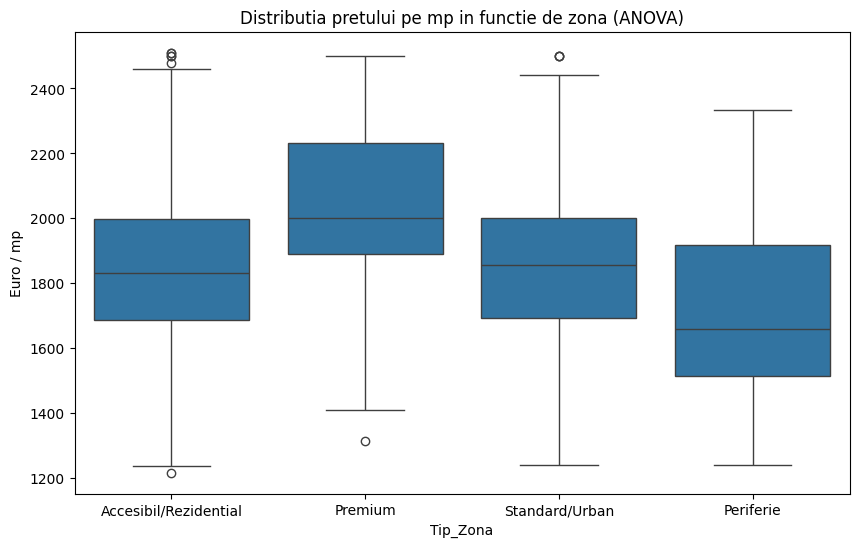

In [130]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Tip_Zona', y='Pret_mp', data=df)
plt.title('Distributia pretului pe mp in functie de zona (ANOVA)')
plt.ylabel('Euro / mp')
plt.show()

### Traducere

Se poate observa o diferenta semnificativa intre pretul mediu pe mp la apartamentele Premium fata de cele de la Periferie de exemplu.

- Periferia pare sa aiba cel mai accesibil pret pe mp

- Accesibil/Rezidential si Standard/Urban par sa aiba preturi similare, testam imediat ipoteza asta

- Premium ocupa locul 1 cum ne si asteptam 

In [131]:
accesibil = df[df['Tip_Zona'] == 'Accesibil/Rezidential']['Pret_mp']

standard = df[df['Tip_Zona'] == 'Standard/Urban']['Pret_mp']

In [132]:
stat_lev, p_lev = stats.levene(accesibil, standard)

p_lev

np.float64(0.41168402342472876)

p_lev = 0.4 > 0.05, variante egale, folosim equal_var = True

In [133]:
t_stat, p_val = stats.ttest_ind(accesibil, standard, equal_var=False)

p_val

np.float64(0.5048711882136828)

### Interpretare

Am vrut sa vedem daca pretul mediu pe mp la apartementele Accesibil/Rezidential nu difera semnificativ de pretul mediu pe mp la cele Standard/Urban

Ipoteze:

- H0: nu difera semnificativ

- H1: difera semnificativ

p-value = 0.5 > 0.05, nu respingem ipoteza nula H0

Concluzie:

Nu sunt suficiente dovezi statistice pentru a spune ca cele doua medii difera semnificativ, la un nivel de semnificatie de 5%